___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [69]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [70]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\obiti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\obiti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\obiti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\obiti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [71]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col=[0])

### Data Wrangling

In [72]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [74]:
df = df.rename(columns={'Recommended IND':'recommend','Review Text':'text'})

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [75]:
df["recommend"].value_counts()

1    19314
0     4172
Name: recommend, dtype: int64

In [76]:
df["recommend"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: recommend, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [77]:
df = df[["text","recommend"]]

In [78]:
df.head(3)

,text,recommend
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0


### Missing Value Detection

In [79]:
df.isnull().sum().any()

True

In [80]:
df.dropna(inplace=True)

In [81]:
df.isnull().sum().any()

False

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [83]:
stop_words = stopwords.words("english")

In [84]:
for i in ["not", "no"]:
        stop_words.remove(i)

In [85]:
def cleaning_fsa(data):
    
    #1. removing upper brackets to keep negative auxiliary verbs in text
    text = data.replace("'",'')
         
    #2. Tokenize and lower
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove punkt and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords     
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #6. joining
    return " ".join(text_cleaned)

In [86]:
df2 = df.copy()

In [87]:
df2["text"] = df2["text"].apply(cleaning_fsa)

In [88]:
df2.head()

,text,recommend
0,absolutely wonderful silky sexy comfortable,1
1,love dress sooo pretty happened find store im ...,1
2,high hope dress really wanted work initially o...,0
3,love love love jumpsuit fun flirty fabulous ev...,1
4,shirt flattering due adjustable front tie perf...,1


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [89]:
positive=df2[df2["recommend"]==1]
positive.shape

(18540, 2)

In [90]:
negative=df2[df2["recommend"]==0]
negative.shape

(4101, 2)

In [91]:
positive = positive["text"].apply(cleaning_fsa)
positive.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
6    aded basket hte last mintue see would look lik...
Name: text, dtype: object

In [92]:
negative = negative["text"].apply(cleaning_fsa)
negative.head()

2     high hope dress really wanted work initially o...
5     love tracy reese dress one not petite foot tal...
10    dress run small esp zipper area run ordered sp...
22    first not pullover styling side zipper wouldnt...
25    loved material didnt really look long dress pu...
Name: text, dtype: object

### Collect Words (positive and negative separately)

In [93]:
all_words_p = " ".join(positive)
all_words_n = " ".join(negative)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [94]:
from wordcloud import WordCloud

In [95]:
worldcloud = WordCloud(background_color="white", max_words =250)

In [96]:
worldcloud.generate(all_words_p)

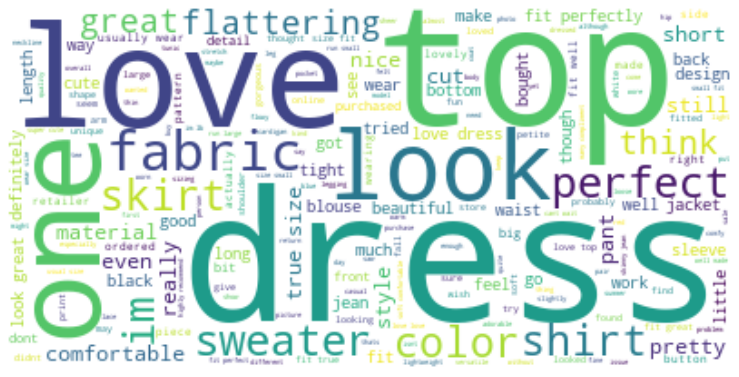

In [97]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [98]:
worldcloud.generate(all_words_n)

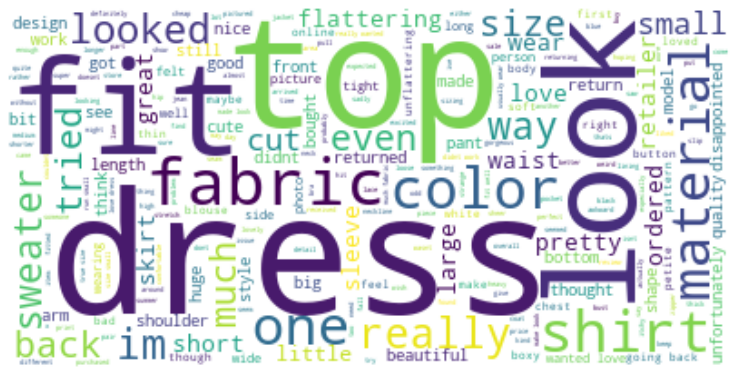

In [99]:
import matplotlib.pyplot as plt # görselliştirmek için matplotlib kütüphanesi kullanılıyor.
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [100]:
X = df2["text"]
y = df2["recommend"]

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=0)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

In [104]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [105]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoolanders', 'zoom', 'zooming'], dtype=object)

In [106]:
df_train_count = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out(), index=X_train.index)
df_train_count

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aame,ab,abbey,abby,abdomen,abdominal,abercrombie,abhor,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absence,...,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
11202,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23079,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
793,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9484,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [108]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [109]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'aaaaaaamazing', 'aaaaandidontwanttopayforshipping', ...,
       'zoolanders', 'zoom', 'zooming'], dtype=object)

In [110]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(), 
                              index= X_train.index)
df_train_tfidf.head(3)

,aa,aaaaaaamazing,aaaaandidontwanttopayforshipping,aaaaannnnnnd,aaaahmazing,aaaahs,aame,ab,abbey,abby,abdomen,abdominal,abercrombie,abhor,ability,abject,able,abnormal,abnormally,abo,abolutely,abou,abroad,abruptly,absence,...,yummiest,yummy,yup,zag,zara,zed,zermatt,zero,zig,zigzag,zigzagging,zillion,zip,zipepr,ziploc,zipped,zipper,zippered,zippie,zipping,zombie,zone,zoolanders,zoom,zooming
11202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.328253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [112]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [115]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[ 347   63]
 [ 231 1624]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.85      0.70       410
           1       0.96      0.88      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.86      0.81      2265
weighted avg       0.90      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      3691
           1       0.97      0.87      0.92     16685

    accuracy                           0.87     20376
   macro avg       0.79      0.88      0.82     20376
weighted avg       0.91      0.87      0.88     20376



### TF-IDF

In [116]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [117]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[ 354   56]
 [ 233 1622]]
Test_Set
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       410
           1       0.97      0.87      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.78      0.87      0.81      2265
weighted avg       0.90      0.87      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.61      0.92      0.73      3691
           1       0.98      0.87      0.92     16685

    accuracy                           0.88     20376
   macro avg       0.80      0.89      0.83     20376
weighted avg       0.91      0.88      0.89     20376



## Naive Bayes 

### Countvectorizer

In [118]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [119]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=10)

In [120]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[  23  387]
 [   3 1852]]
Test_Set
              precision    recall  f1-score   support

           0       0.88      0.06      0.11       410
           1       0.83      1.00      0.90      1855

    accuracy                           0.83      2265
   macro avg       0.86      0.53      0.51      2265
weighted avg       0.84      0.83      0.76      2265

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.09      0.17      3691
           1       0.83      1.00      0.91     16685

    accuracy                           0.83     20376
   macro avg       0.89      0.55      0.54     20376
weighted avg       0.85      0.83      0.77     20376



### TF-IDF

In [121]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [122]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[  17  393]
 [   1 1854]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.04      0.08       410
           1       0.83      1.00      0.90      1855

    accuracy                           0.83      2265
   macro avg       0.88      0.52      0.49      2265
weighted avg       0.85      0.83      0.75      2265

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.11      0.19      3691
           1       0.83      1.00      0.91     16685

    accuracy                           0.84     20376
   macro avg       0.90      0.55      0.55     20376
weighted avg       0.86      0.84      0.78     20376



## Support Vector Machine (SVM)

### Countvectorizer

In [123]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [124]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[ 233  177]
 [  64 1791]]
Test_Set
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       410
           1       0.91      0.97      0.94      1855

    accuracy                           0.89      2265
   macro avg       0.85      0.77      0.80      2265
weighted avg       0.89      0.89      0.89      2265

Train_Set
              precision    recall  f1-score   support

           0       0.85      0.65      0.73      3691
           1       0.93      0.97      0.95     16685

    accuracy                           0.91     20376
   macro avg       0.89      0.81      0.84     20376
weighted avg       0.91      0.91      0.91     20376



### TD-IDF

In [125]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [126]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[ 214  196]
 [  50 1805]]
Test_Set
              precision    recall  f1-score   support

           0       0.81      0.52      0.64       410
           1       0.90      0.97      0.94      1855

    accuracy                           0.89      2265
   macro avg       0.86      0.75      0.79      2265
weighted avg       0.89      0.89      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.86      0.61      0.71      3691
           1       0.92      0.98      0.95     16685

    accuracy                           0.91     20376
   macro avg       0.89      0.79      0.83     20376
weighted avg       0.91      0.91      0.90     20376



## Random Forest

### Countvectorizer

In [127]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [128]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[  22  388]
 [   1 1854]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.05      0.10       410
           1       0.83      1.00      0.91      1855

    accuracy                           0.83      2265
   macro avg       0.89      0.53      0.50      2265
weighted avg       0.85      0.83      0.76      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.47      0.64      3691
           1       0.90      1.00      0.95     16685

    accuracy                           0.90     20376
   macro avg       0.95      0.74      0.79     20376
weighted avg       0.91      0.90      0.89     20376



### TF-IDF

In [129]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [130]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[  19  391]
 [   1 1854]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.05      0.09       410
           1       0.83      1.00      0.90      1855

    accuracy                           0.83      2265
   macro avg       0.89      0.52      0.50      2265
weighted avg       0.85      0.83      0.76      2265

Train_Set
              precision    recall  f1-score   support

           0       1.00      0.46      0.63      3691
           1       0.89      1.00      0.94     16685

    accuracy                           0.90     20376
   macro avg       0.95      0.73      0.78     20376
weighted avg       0.91      0.90      0.89     20376



## Ada Boosting

### Countvectorizer

In [131]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [132]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[ 232  178]
 [  92 1763]]
Test_Set
              precision    recall  f1-score   support

           0       0.72      0.57      0.63       410
           1       0.91      0.95      0.93      1855

    accuracy                           0.88      2265
   macro avg       0.81      0.76      0.78      2265
weighted avg       0.87      0.88      0.88      2265

Train_Set
              precision    recall  f1-score   support

           0       0.79      0.65      0.72      3691
           1       0.93      0.96      0.94     16685

    accuracy                           0.91     20376
   macro avg       0.86      0.81      0.83     20376
weighted avg       0.90      0.91      0.90     20376



### TF-IDF

In [133]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [134]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[ 219  191]
 [  95 1760]]
Test_Set
              precision    recall  f1-score   support

           0       0.70      0.53      0.60       410
           1       0.90      0.95      0.92      1855

    accuracy                           0.87      2265
   macro avg       0.80      0.74      0.76      2265
weighted avg       0.87      0.87      0.87      2265

Train_Set
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      3691
           1       0.94      0.97      0.95     16685

    accuracy                           0.92     20376
   macro avg       0.88      0.84      0.86     20376
weighted avg       0.92      0.92      0.92     20376



## DL modeling

In [135]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [136]:
X = df['text']
y = df['recommend']

In [137]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

### Creating word index

In [138]:
tokenizer.word_index

{}

In [139]:
len(tokenizer.word_index)

0

In [140]:
tokenizer.fit_on_texts(X)

### Converting tokens to numeric

In [141]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [142]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [143]:
num_tokens.max()

116

In [144]:
max_tokens = 61

In [145]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.5212667285013913

### Fixing token counts of all documents (pad_sequences)

In [146]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

### Train Set Split

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=0)

### Modeling

In [149]:
model = Sequential()

In [150]:
embedding_size = 50

In [151]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

In [152]:
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=25, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=12, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

In [153]:
optimizer = Adam(learning_rate=0.008)

In [154]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [155]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 61, 50)            0         
                                                                 
 gru (GRU)                   (None, 61, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 61, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 61, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 61, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [156]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           patience = 1, restore_best_weights=True)

In [157]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61060833, 2.76022758])

In [158]:
model.fit(X_train, y_train, epochs=10, batch_size=256, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
80/80 [==============================] - 22s 165ms/step - loss: 0.4668 - recall: 0.7862 - val_loss: 0.4135 - val_recall: 0.7957
Epoch 2/10
80/80 [==============================] - 12s 151ms/step - loss: 0.3024 - recall: 0.8602 - val_loss: 0.3554 - val_recall: 0.8636
Epoch 3/10
80/80 [==============================] - 12s 148ms/step - loss: 0.2318 - recall: 0.8957 - val_loss: 0.3213 - val_recall: 0.9073
Epoch 4/10
80/80 [==============================] - 12s 146ms/step - loss: 0.1778 - recall: 0.9181 - val_loss: 0.3425 - val_recall: 0.8771


In [159]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.466776,0.786215,0.413517,0.795687
1,0.302417,0.860234,0.355413,0.863612
2,0.231768,0.895655,0.321313,0.907278
3,0.177782,0.918130,0.342529,0.877089


<AxesSubplot:>

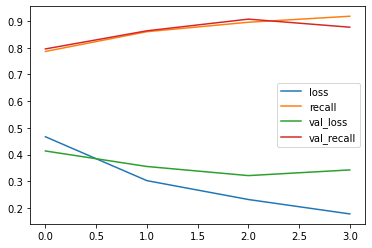

In [160]:
model_loss.plot()

In [161]:
model.evaluate(X_test, y_test)

71/71 [==============================] - 1s 13ms/step - loss: 0.3213 - recall: 0.9073


[0.32131287455558777, 0.9072776436805725]

In [162]:
model.evaluate(X_train, y_train)

637/637 [==============================] - 8s 13ms/step - loss: 0.1719 - recall: 0.9281


[0.17194317281246185, 0.9281390309333801]

In [163]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

71/71 [==============================] - 2s 13ms/step
[[ 314   96]
 [ 172 1683]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       410
           1       0.95      0.91      0.93      1855

    accuracy                           0.88      2265
   macro avg       0.80      0.84      0.81      2265
weighted avg       0.89      0.88      0.89      2265



In [164]:
y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

637/637 [==============================] - 8s 13ms/step
[[ 3562   129]
 [ 1199 15486]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.97      0.84      3691
           1       0.99      0.93      0.96     16685

    accuracy                           0.93     20376
   macro avg       0.87      0.95      0.90     20376
weighted avg       0.95      0.93      0.94     20376



71/71 [==============================] - 1s 13ms/step


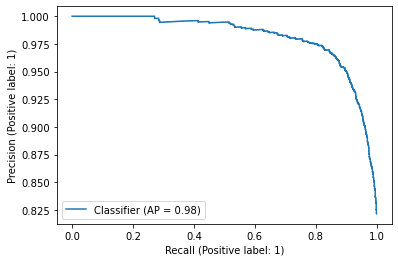

In [165]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [166]:
from sklearn.metrics import precision_recall_curve, average_precision_score

average_precision_score(y_test, y_pred_proba)

0.9814746528440427

## BERT Modeling

In [167]:
X

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: text, Length: 22641, dtype: object

### Tokenization

### Train test split

### Transformation text to 3D tensor

### Batch Size

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___